
# Tackle Noise with Error Correction
Name:Zidane Khan , Rollno:BAI&D26

In [ ]:
pip install qiskit-ignis

In [ ]:
pip install qiskit-aer

Original counts:
{'111': 506, '000': 494}
{'000': 127.97388823340988, '001': 128.01502270316476, '010': 127.94645444545196, '011': 128.01942298486037, '100': 128.06490361684098, '101': 128.02054833162796, '110': 127.97002121307428, '111': 127.98973847156972}


<ipython-input-10-a131b2134982>:30: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job=backend.run(qobj)
<ipython-input-10-a131b2134982>:37: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  cal_job=backend.run(assemble(qc))


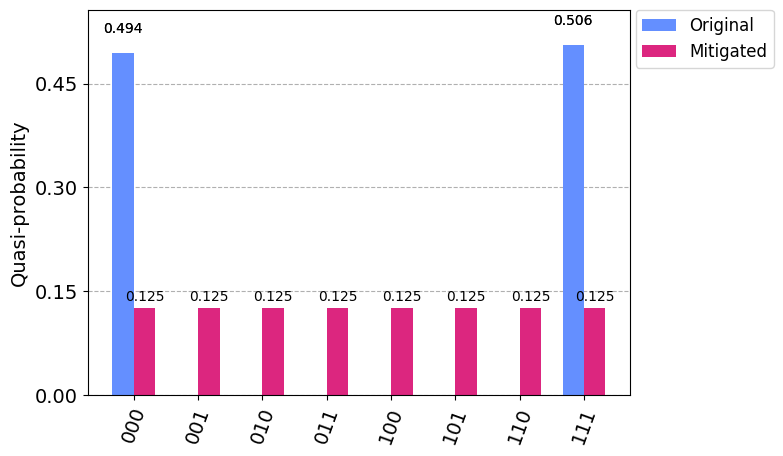

In [ ]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import plot_histogram
# from qiskit.ignis.mitigation import CompleteMeasFitter, complete_meas_cal tensored_meas_cal
from qiskit.ignis.mitigation import CompleteMeasFitter, complete_meas_cal, tensored_meas_cal


# Define the quantum circuit

qc=QuantumCircuit (3,3)
state_labels = ['000', '001', '010', '011', '100', '101', '110', '111']

# Apply gates and operations to the circuit

qc.h(0)

qc.cx(0, 1)

qc.cx(0, 2)

qc.measure([0,1,2],[0,1,2])

#Transpile the circuit

backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

#Simulate the noisy circuit

qobj = assemble(transpiled_qc, shots=1000)
job=backend.run(qobj)
result = job.result()
counts = result.get_counts()

#Perform error mitigation

cal_circuits, state_labels = complete_meas_cal(qubit_list=[0, 1, 2])
cal_job=backend.run(assemble(qc))
cal_results = cal_job.result()
# state_labels = ['00', '01', '10', '11']

# Initialize the CompleteMeasFitter with the state_labels
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

# Apply the error mitigation with raw data (uncorrected counts)
mitigated_counts = meas_fitter.filter.apply(cal_results.get_counts(qc))
#Print the original counts

print("Original counts:")

print(counts)

#Print the mitigated counts print("Mitigated counts: ")

print(mitigated_counts)

#Plot the histograms of the original and mitigated counts

plot_histogram([counts, mitigated_counts], legend=['Original','Mitigated'])